In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython import get_ipython
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/updated_pollution_dataset.csv')
df.head()

Mounted at /content/drive


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
df.shape

(5000, 10)

In [4]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [5]:
df.drop(columns=['PM2.5','PM10'], inplace=True)

In [6]:
df.columns

Index(['Temperature', 'Humidity', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [7]:
df['Air Quality'].value_counts()

,count
Air Quality,
Good,2000
Moderate,1500
Poor,1000
Hazardous,500


In [8]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['Air Quality_encoded'] = label_encoder.fit_transform(df['Air Quality'])


In [9]:
df.head()

,Temperature,Humidity,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,Air Quality_encoded
0,29.8,59.1,18.9,9.2,1.72,6.3,319,Moderate,2
1,28.3,75.6,30.8,9.7,1.64,6.0,611,Moderate,2
2,23.1,74.7,24.4,12.6,1.63,5.2,619,Moderate,2
3,27.1,39.1,13.5,5.3,1.15,11.1,551,Good,0
4,26.5,70.7,21.9,5.6,1.01,12.7,303,Good,0


In [10]:
df.sample(20)

,Temperature,Humidity,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,Air Quality_encoded
821,38.5,81.3,39.8,8.6,1.55,3.5,670,Poor,3
305,32.7,94.8,34.1,9.8,1.63,5.4,392,Moderate,2
3643,40.6,60.7,23.0,5.4,2.03,5.9,500,Poor,3
235,32.1,54.6,28.1,20.3,1.54,5.2,701,Moderate,2
4472,26.9,51.6,24.6,5.1,1.06,13.1,534,Good,0
1163,31.6,81.1,31.6,12.3,1.45,5.5,664,Moderate,2
278,35.4,84.6,23.9,9.4,1.63,9.1,629,Moderate,2
1640,32.2,77.3,17.3,13.3,1.60,8.4,454,Moderate,2
340,42.2,66.0,48.0,12.8,2.54,3.6,709,Hazardous,1
1678,23.0,43.6,24.5,5.9,0.88,10.5,317,Good,0


In [11]:
df.drop(columns=['Air Quality'], inplace=True)

In [12]:
df.head()

,Temperature,Humidity,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality_encoded
0,29.8,59.1,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,21.9,5.6,1.01,12.7,303,0


In [13]:
X = df.drop(columns=['Air Quality_encoded'])
y = df['Air Quality_encoded'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X_train

,Temperature,Humidity,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
2913,28.8,74.7,22.5,5.4,1.91,6.1,482
3275,24.2,58.7,28.3,6.3,0.84,14.0,243
775,29.4,68.8,14.3,5.7,1.07,12.2,358
217,36.6,78.5,45.5,17.8,1.58,4.0,470
1245,23.2,69.7,24.6,3.5,0.97,12.3,579
...,...,...,...,...,...,...,...
4931,20.2,76.5,14.3,4.4,0.89,11.1,471
3264,21.4,78.9,13.1,1.9,1.02,10.7,579
1653,21.9,71.2,17.1,3.8,0.95,10.4,208
2607,22.1,56.2,25.4,4.0,0.93,12.5,389


In [15]:
X_test

,Temperature,Humidity,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
398,32.4,80.4,36.8,21.1,1.76,9.0,643
3833,28.8,77.2,27.5,4.8,1.60,10.8,538
4836,31.1,60.2,18.4,8.7,1.69,5.0,629
4572,28.6,45.6,30.2,7.0,1.42,7.6,681
636,23.4,67.7,20.9,6.9,0.93,11.2,364
...,...,...,...,...,...,...,...
4228,35.5,73.2,32.8,15.4,2.56,9.1,879
2367,23.9,70.2,24.0,1.8,1.03,12.2,458
788,28.3,39.7,28.9,0.6,0.99,15.1,384
1452,34.6,80.3,31.5,7.4,1.28,9.5,326


In [16]:
y_test

array([3, 2, 2, 2, 0, 2, 3, 0, 0, 3, 0, 2, 2, 0, 3, 3, 3, 2, 2, 0, 3, 2,
       2, 1, 2, 3, 2, 2, 0, 0, 0, 0, 2, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       2, 0, 0, 3, 2, 1, 0, 0, 2, 0, 2, 0, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 3, 0, 2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 1, 2, 0, 3, 2, 2,
       0, 0, 2, 3, 0, 0, 3, 3, 0, 0, 2, 3, 0, 0, 3, 2, 0, 0, 2, 0, 2, 2,
       2, 0, 3, 3, 1, 0, 3, 0, 1, 1, 0, 2, 1, 0, 0, 3, 3, 0, 0, 0, 3, 2,
       0, 2, 0, 3, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3, 3, 2, 0,
       1, 0, 0, 2, 3, 2, 3, 0, 0, 2, 0, 0, 1, 1, 0, 0, 3, 0, 0, 3, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2,
       0, 1, 2, 1, 3, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1,
       0, 3, 0, 3, 2, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 1, 2, 1, 2, 0, 3, 2,
       2, 3, 0, 2, 0, 3, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 3,
       2, 3, 3, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 3, 0, 2, 2, 3, 0, 1, 0, 2, 2, 0, 0, 2, 2,

In [17]:
y_train

array([2, 0, 0, ..., 0, 0, 2])

In [18]:
print("Unique classes in y_train:", np.unique(y_train))


Unique classes in y_train: [0 1 2 3]


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[-0.19038203,  0.30052156, -0.43681044, ...,  0.74881213,
        -0.64600267, -0.0991797 ],
       [-0.87791109, -0.70851675,  0.21032854, ..., -1.21694773,
         1.54960737, -1.65499083],
       [-0.10070432, -0.07156131, -1.35173107, ..., -0.79440122,
         1.04934179, -0.90637878],
       ...,
       [-1.22167562,  0.07979443, -1.03931914, ..., -1.01486027,
         0.54907621, -1.88282928],
       [-1.19178305, -0.86617898, -0.11324095, ..., -1.05160345,
         1.13271939, -0.70457901],
       [-0.33984487,  0.86179912, -0.03513797, ..., -0.51882741,
        -0.28469975, -0.50277924]])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential()

model.add(Dense(32,activation='relu',input_dim=7))
model.add(Dense(24,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,516 (5.92 KB)

 Trainable params: 1,516 (5.92 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [30]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3445 - loss: 1.2613 - val_accuracy: 0.8350 - val_loss: 0.7428
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.5874 - val_accuracy: 0.9025 - val_loss: 0.2941
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9002 - loss: 0.2893 - val_accuracy: 0.9150 - val_loss: 0.2334
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9130 - loss: 0.2274 - val_accuracy: 0.9212 - val_loss: 0.2046
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9221 - loss: 0.2078 - val_accuracy: 0.9225 - val_loss: 0.1926
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9355 - loss: 0.1835 - val_accuracy: 0.9200 - val_loss: 0.1833
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9300 - loss: 0.1879 - val_accuracy: 0.9287 - val_loss: 0.1755
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9377 - loss: 0.1738 - val_accuracy: 0.

In [31]:
model.layers[0].get_weights()

[array([[-5.79229712e-01, -7.43367225e-02,  1.81311443e-01,
          3.06853384e-01,  8.54716077e-02,  9.22425315e-02,
         -5.72631955e-01,  2.42980689e-01,  2.29816034e-01,
         -2.01631933e-01,  5.63201867e-02, -1.86824709e-01,
         -1.13926262e-01,  3.69672865e-01, -5.96571937e-02,
         -2.88152456e-01, -1.11101970e-01, -6.73669055e-02,
         -5.80029309e-01,  1.36091365e-02, -1.77993890e-04,
         -1.38996214e-01,  1.21814109e-01,  2.87001163e-01,
          2.75306433e-01,  3.40954393e-01,  2.95002401e-01,
          1.48884043e-01,  1.40097409e-01,  1.48648113e-01,
         -2.72352725e-01, -4.61991370e-01],
        [-2.85393417e-01,  2.84842849e-01, -1.32357582e-01,
          2.85105765e-01,  2.64512390e-01, -1.30653068e-01,
          4.90932018e-02, -1.98077634e-01, -4.89245355e-01,
         -3.24842691e-01, -9.67511535e-01, -1.99772883e-02,
          2.39081040e-01,  3.54806423e-01,  3.65979731e-01,
         -3.01273316e-01,  4.42965835e-01, -8.47231448e-

In [32]:
ylog = model.predict(X_test_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [33]:
ylog[13]

array([9.9917978e-01, 7.9340472e-14, 8.2025450e-04, 2.1739065e-10],
      dtype=float32)

In [37]:
y_pred = np.argmax(ylog, axis=1)

In [35]:
y_pred[7]

array([1, 0, 0, 0])

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.937

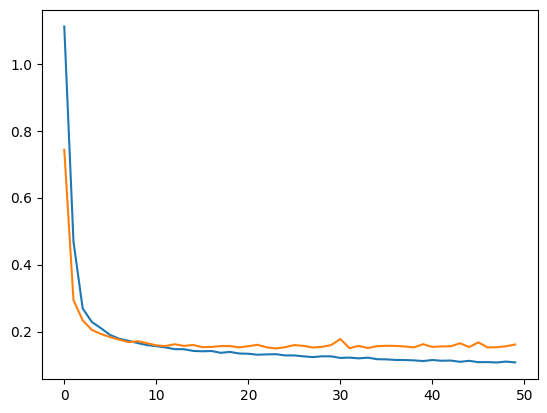

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

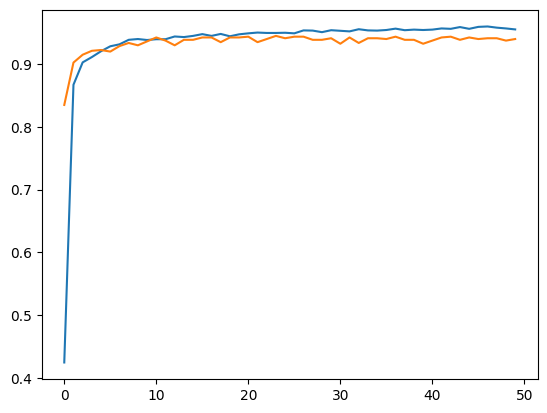

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


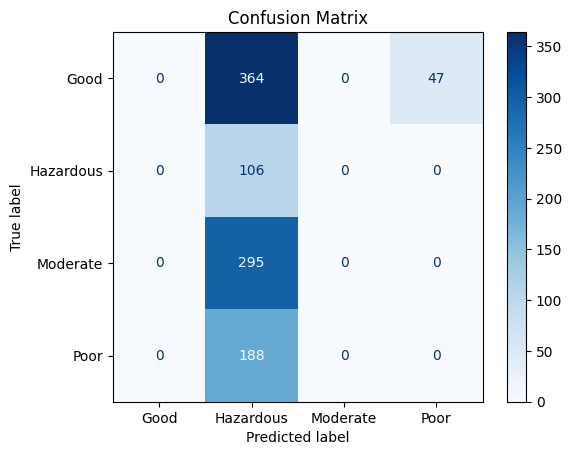

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

class_names = label_encoder.classes_

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
